## Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


First, let's load the dataset into a pandas dataframe:

In [2]:
import pandas as pd

df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Then, we notice that all the data here indeed comes from a 30-day window, namely, during the month 3/2017.

In [5]:
print('Earliest transaction:', df['created_at'].min())
print('Latest transaction:', df['created_at'].max())

Earliest transaction: 2017-03-01 0:08:09
Latest transaction: 2017-03-30 9:55:00


Let's calculate the average order value and verify that it is $3145.13.

In [6]:
print('AOV:', df['order_amount'].mean())

AOV: 3145.128


#### (a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

One way to see what could be going wrong with our analysis is to look at the distribution of order values more specifically. Let's make a histogram of the order values:

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

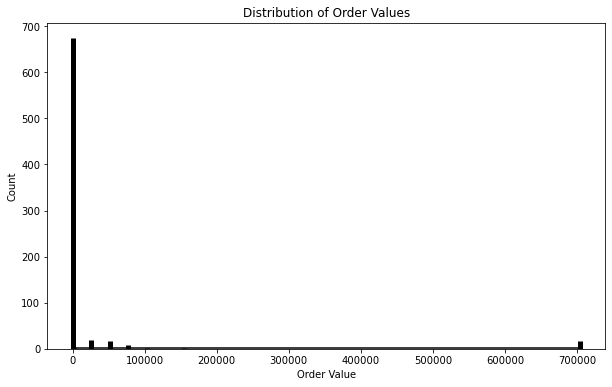

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['order_amount'].values, linewidth=5)
plt.title("Distribution of Order Values")
plt.xlabel("Order Value")
plt.show()

In [28]:
print("Maximum order value in dataset:", df['order_amount'].max())

Maximum order value in dataset: 704000


The plot above reveals a heavily skewed distribution of order values. In particular, the distribution is skewed right, and that the maximum order amount in the dataset is \\$704,000. Let's look at orders whose order amounts are larger than, say, \\$100,000:

In [29]:
df[df['order_amount'] > 100000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


From this view, it seems that there are two things going on: (i) shop 78 sells expensive shoes, and (ii) user 607 bought 2000 items from shop 42.

This quick analysis suggests that these extremely high order values influence the average order value that we calculate.

#### (b) What metric would you report for this dataset?

A better metric that summarizes order value is probably just the **median order value**, since this metric is not sensitive to outliers. If we're concerned with the fact that the AOV is too expensive for sneakers, we should instead look at the average cost of the sneakers in our dataset, since orders can contain multiple items. Therefore, an even better metric for our analysis would be the **average item value**.

#### (c) What is its value?

From the calculations below, the **median order value** is about \\$284, and the **average item value** is about \\$387.74.

In [33]:
print("Median Order Value:", df['order_amount'].median())
print("Average Item Value:", (df['order_amount'] / df['total_items']).mean())

Median Order Value: 284.0
Average Item Value: 387.7428


## Question 2

#### (a) 54

I performed a simple join between the Orders and Shippers tables. Then, just count how many orders were shipped by Speedy Express.

`SELECT COUNT(*)
FROM Orders o INNER JOIN Shippers s
    ON o.ShipperID = s.ShipperID
WHERE s.ShipperName = 'Speedy Express';`

#### (b) Peacock (40 orders)

I first joined the employees table with the orders table to get the number of orders per employee. Then, I selected the corresponding record from this view that had the maximum value for the number of orders.

`SELECT MAX(num_orders) AS num_orders, LastName 
FROM (
    SELECT COUNT(*) AS num_orders, e.LastName
    FROM Employees e
    INNER JOIN Orders o
    ON e.EmployeeID = o.EmployeeID
    GROUP BY e.EmployeeID);`
    
#### (c) Gorgonzola Telino (ProductID=31, 5 orders)

I needed to join the orders table with the customers table to get the coutry information from the customers. Then, I needed the order details and products tables to get the product information. Then, I used this view to count the number of orders per product from customers in Germany, followed by selecting the product with the maximum number of orders.

`SELECT MAX(num_orders) num_orders, ProductID, ProductName 
FROM (
    SELECT COUNT(*) num_orders, 
           p.ProductID, 
           p.ProductName 
    FROM Orders o INNER JOIN Customers c
            ON o.CustomerID = c.CustomerID
        INNER JOIN OrderDetails od
            ON o.OrderID = od.OrderID
        INNER JOIN Products p
            ON od.ProductID = p.ProductID
    WHERE c.Country = 'Germany'
    GROUP BY p.ProductID);`